# How the *Helmholtz* do you make a good electromagnet?

Perhaps not a question that has come to every persons's mind, but it's happened to me once or twice, so let's take a look at it.  

If you move in the right circles, it's actually a problem of some consequence. How to make a nice clean magnetic field? Helmholtz coils are usually the answer and a set of really good coils is an essential component to a number of modern physics laboratories. I've used many of them in magnetic resonance experiments and have personally witnessed them in various labs studying plasma physics, exotic ultracold atom states, and ultra-sensitive magnetometer/gyroscope schemes. Really, their use pops up all over the place, even the biology of [magnetotactic bacteria](https://www.nature.com/articles/srep04104) and [magnetoreceptive honeybees](https://link.springer.com/article/10.1007/s00359-017-1214-4).

# The Simple Helmholtz Coil  

![png](helmholtz_coils.png)
![svg](helmholtz_fields.png)  
(images by Ansgar Hellwig & Geek3, under a [CC-BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/) license)

The principle is quite simple: Take two coils of wire, connect them, pass a current, and you're left with a very homogeneous magnetic field at the midpoint between the coils. The magnitude of the field produced scales with the radius, $R$, of the coils, the number, $N$ turns of wire, the applied current, $I$, and the spacing between coils. To obtain the most homogeneous field, the two coils must be spaced a distance of $R$ from one another - the sweet spot is then at $R/2$. For this nicely symmetric, ideal case, the central field magnitude is  
$$B(x=0, y=0) = \bigg(\frac{8}{5\sqrt{5}}\bigg) \frac{\mu_0NI}{R},$$
where $\mu_0$ is the magnetic permeability constant and we're calling the center axial midpoint the origin of our $(x,y)$ coordinate system.

But for many experiments, it's the field homogeneity that's most important. What happens if the coil symmetry is off? What's the error on that? By how much does the magnetic field diverge and over what distance? The expression above says nothing about variations in $\hat{x}$ or $\hat{y}$ directions. For many applications, these are questions that must be answered at the outset since they ultimately limit sensitivity. But how do we do this before building anything? Answer: Simulation!  

# Forth-Order Helmholtz Equations

Luckily, the most difficult portions of this task have been solved in a [publication by M.S. Crosser, et al.](https://aip.scitation.org/doi/abs/10.1063/1.3474227) In their paper, they sketch a solution for magnetic fields in $\hat{x}$ and $\hat{y}$ around the center point, including terms out to forth order, $\mathcal{O}(4)$. At this precision, the order of approximation for any calculated $B(x,y)$ is probably better than our general engineering skills. Here's the system they're working with:  
![png](2010_apl_crosser_fig1.png)  
[M.S. Crosser, et al., *Rev. Sci. Instrum.* **81**, 084701 (2010).](https://aip.scitation.org/doi/abs/10.1063/1.3474227)  

The relavant symbols are defined in the table below (ignore the rest, which are used only in the derivation). But take notice of the four rectangular blocks - these are the coil cross-sections, where the tiny inner squares represent an individual wire turning. *"Wait, now... aren't wires round? Why is the wire square?"* We'll get back to that in a moment.  

For now, just realize that we've got several tunable parameters to play with. The coil's rectangular dimensions $a \times b$ are adjustable, allowing for a different number of horizontal and verticle windings ($N_a$ and $N_b$), or even different thicknesses of wire, $h$, and wire insulation, $t$ (see figure below).  

Additionally, there are correction terms, $\rho$ and $\tau$, available for each coil's radius. This allows each to have an independent *mean* radius: $R-\rho$ for the left coil and $R-\tau$ for the right coil. So if $\rho \neq \tau$, then there's no longer a plane of symmetry in the center and we can account for this in the calculation. The purpose of including all these parameters is to be able to simulate realistic imperfections in the Helmholtz system. Very nice!

| symbol       | description  |
|:------------:| ------------ |
| $B_x(x,y)$   | magnetic field in $\hat{x}$ direction at point $P(x,y)$ |
| $B_y$(x,y)   | magnetic field in $\hat{y}$ direction at point $P(x,y)$ |
| $R$          | *ideal* coil radius and separation between coil midplanes |
| $N$          | total number of wire turns in each coil |
| $N_a$        | number of horizontal windings per coil |
| $N_b$        | number of vertical windings per coil |
| $I$          | current applied to the system |
| $\mu_0$      | permeability constant |
| $a$          | width of coil |
| $b$          | height of coil |
| $h$          | thickness of wire |
| $t$          | thickness of wire insulation |
| $\rho$       | correction term for left coil radius: $R-\rho$ |
| $\tau$       | correction term for right coil radius: $R-\tau$ |  

So, what do these forth order expressions look like? Honestly, anything out to $\mathcal{O}(4)$ is going to be quite ugly. On the other hand, it *is* just a bunch of algebra, and so should be fairly easy to code up. Here are the main field terms and their associated factors:  

$$
\begin{align*}
    B_x(x,y) =& \frac{8\mu_0NI}{5\sqrt{5}R}\bigg[1 - \frac{b^2}{60R^2} + F_{ex} + \frac{x}{125R}F_{1x} + \frac{(2x^2-y^2)}{125R^2}F_{2x}\\ 
              &+ \frac{(3xy^2-2x^3)}{125R^3}F_{3x} - \frac{18}{125R^4}(8x^4-24x^2y^2+3y^4) + \ldots\bigg] \\
    B_y(x,y) =& \frac{8\mu_0NI}{5\sqrt{5}R}\bigg[\frac{y}{125R}F_{1y} + \frac{xy}{125R^2}F_{2y} + \frac{y(4x^2-y^2)}{125R^3}F_{3y}\\ 
              &+ \frac{xy}{125R^4}(288x^2-216y^2) + \ldots\bigg] \\
    F_{ex}   =& -\frac{(18a^4+13b^4)}{1250R^4} + \frac{31a^2b^2}{750R^4} + \frac{\tau+\rho}{R}\bigg[\frac{1}{5}+\frac{2(a^2-b^2)}{250R^2}\bigg]\\ 
              &- \frac{(\tau^2+\rho^2)}{250R^2}\bigg(25+\frac{52b^2-62a^2}{R^2}\bigg) - \frac{8(\tau^3+\rho^3)}{25R^3} - \frac{52(\tau^4+\rho^4)}{125R^4} \\
    F_{1x}   =& \frac{(\tau-\rho)}{R}\bigg[150+\frac{(24b^2-44a^2)}{R^2}\bigg] + \frac{165(\tau^2-\rho^2)}{R^2} + \frac{96(\tau^3-\rho^3)}{R^3} \\ 
    F_{2x}   =& \frac{31b^2-36a^2}{R^2} + \frac{60(\tau+\rho)}{R} + \frac{186(\tau^2+\rho^2)}{R^2} \\ 
    F_{3x}   =& \frac{88(\tau-\rho)}{R} \\ 
    F_{1y}   =& \frac{(\rho-\tau)}{R}(75+\frac{12b^2-22a^2}{R^2}) + \frac{165(\rho^2-\tau^2)}{2R^2} + \frac{48(\rho^3-\tau^3)}{R^3} \\ 
    F_{2y}   =& \frac{2(36a^2-31b^2)}{R^2} - \frac{120(\tau+\rho)}{R} - \frac{372(\tau^2+\rho^2)}{R^2} \\ 
    F_{3y}   =& \frac{66(\tau-\rho)}{R} 
\end{align*}
$$

Alright, now we have all the mathematical tools needed to start making design choices for our set of Helmholtz coils. Let's implement the equations in python and then start asking questions.

In [1]:
# package imports and plotting elements
from math import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = '#e8e8e8'
plt.rcParams['axes.edgecolor'] = '#e8e8e8'
plt.rcParams['figure.facecolor'] = '#e8e8e8'

In [2]:
# define magnetic field components to forth order
def F_ex(a, b, R, tau, rho):
    term1 = (18*a**4 + 13*b**4)/(1250*R**4)
    term2 = 31*a**2*b**2/(750*R**4)
    term3 = (tau + rho)/R * (1/5 + 2*(a**2-b**2)/(250*R**2))
    term4 = (tau**2+rho**2)/(250*R**2) * (25 + (52*b**2-62*a**2)/(R**2))
    term5 = 8*(tau**3+rho**3)/(25*R**3)
    term6 = 52*(tau**4+rho**4)/(125*R**4)
    
    return -term1 + term2 + term3 - term4 - term5 - term6


def F_1x(a, b, R, tau, rho):
    term1 = (tau-rho)/R * (150 + (24*b**2-44*a**2)/(R**2))
    term2 = 165*(tau**2-rho**2)/(R**2)
    term3 = 96*(tau**3-rho**3)/(R**3)
    
    return term1 + term2 + term3


def F_2x(a, b, R, tau, rho):
    term1 = (31*b**2-36*a**2)/(R**2)
    term2 = 60*(tau+rho)/R
    term3 = 186*(tau**2+rho**2)/(R**2)
    
    return term1 + term2 + term3


def F_3x(R, tau, rho):
    
    return 88*(tau-rho)/R


def F_1y(a, b, R, tau, rho):
    term1 = (rho-tau)/R * (75 + (12*b**2-22*a**2)/(R**2))
    term2 = 165*(rho**2-tau**2)/(2*R**2)
    term3 = 48*(rho**3-tau**3)/(R**3)
    
    return term1 + term2 + term3


def F_2y(a, b, R, tau, rho):
    term1 = 2*(36*a**2-31*b**2)/(R**2)
    term2 = 120*(tau-rho)/R
    term3 = 372*(tau**2+rho**2)/(R**2)
    
    return term1 - term2 - term3


def F_3y(R, tau, rho):
    
    return 66*(tau-rho)/R


def Bx(x, y, N, I, a, b, R, tau, rho):
    u0 = 1.2566370614 # in units of mT*mm/A
    
    prefactor_0 = 8*u0*N*I/(5*sqrt(5)*R)
    term2 = b**2/(60*R**2)
    prefactor_5 = (2*x**2-y**2)/(125*R**2)
    prefactor_6 = (3*x*y**2-2*x**3)/(125*R**3)
    term7 = 18/(125*R**4)*(8*x**4-24*x**2*y**2+3*y**4)
    
    return prefactor_0 * (1 - term2 + F_ex(a, b, R, tau, rho)   \
                          + x/(125*R)*F_1x(a, b, R, tau, rho)   \
                          + prefactor_5*F_2x(a, b, R, tau, rho) \
                          + prefactor_6*F_3x(R, tau, rho) - term7)


def By(x, y, N, I, a, b, R, tau, rho):
    u0 = 1.2566370614 # in units of mT*mm/A
    
    prefactor_0 = 8*u0*N*I/(5*sqrt(5)*R)
    prefactor_3 = y*(4*x**2-y**2)/(125*R**3)
    term4 = x*y/(125*R**4)*(288*x**2-216*y**2)
    
    return prefactor_0 * (y/(125*R)*F_1y(a, b, R, tau, rho)        \
                          + x*y/(125*R**2)*F_2y(a, b, R, tau, rho) \
                          + prefactor_3*F_3y(R, tau, rho) + term4)

# Winding Dimensions Matter

In the above equations, we have a choice of winding dimensions $a \times b$ for these coils.  So, what dimensions should be chosen? In essence, each coil could be a solenoid of 20 turns ($N_a=20, N_b=1$). Or, we could stack the same 20 windings vertically ($N_a=1, N_b=20$).  

The choice here might seem arbitrary until you look at how the higher order terms are affected. The best possible choice will involve *minimizing* the higher order terms as much as possible. For instance, one way to minimize field divergence at the center point would be to ensure that each coil radius is exactly R, meaning the correction factors $\rho$ and $\tau$ are zero. Take another look above at how many terms drop out when $\rho = \tau = 0$ - it definitely makes a difference.

Another way to minimize higher order terms is to balance the ratio of winding width to winding height. The expressions for $F_{2x}$ and $F_{2y}$ both contain the factor $(31b^2-36a^2)$, and so each will go to zero when $b/a = \sqrt{36/31}$. We only have integer winding numbers to work with, so the closest match will be $b/a = 14/13$.  

How much of a difference does this really make, though? Let's visualize it.

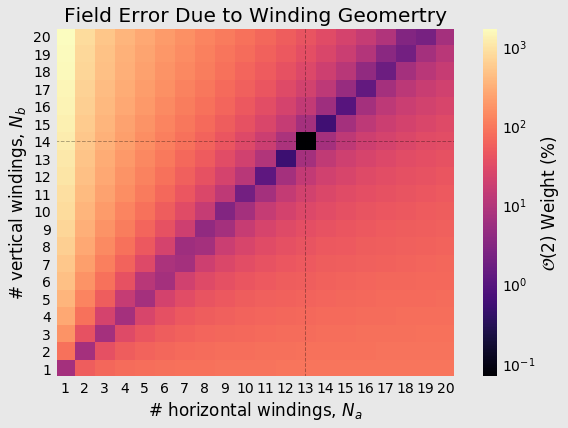

In [3]:
# number of windings in each direction
N_start = 1
N_stop  = 21

N_a = np.arange(N_start, N_stop, 1)
N_b = np.arange(N_start, N_stop, 1)

# set ideal case and empty array for pct changes
ba_ratio = 6/sqrt(31)
percent_O2 = np.empty(shape=[int(N_a.shape[0]), int(N_b.shape[0])], dtype=np.float64)

# iterate through strength of each [a,b] case
for ia, a_val in enumerate(N_a):
    for ib, b_val in enumerate(N_b):
        percent_O2[ib, ia] = 100*abs((b_val/a_val - ba_ratio)/ba_ratio)

# 2D plot of 2nd Order contribution vs winding
axes_range = [0, N_a.max(), 0, N_b.max()]

fig = plt.figure(figsize=(8,6))

plt.title('Field Error Due to Winding Geomertry')
plt.xlabel('# horizontal windings, $N_{a}$')
plt.ylabel('# vertical windings, $N_{b}$')

plt.xticks(N_a-0.5, N_a) # align tick marks with data
plt.yticks(N_b-0.5, N_b)

plt.imshow(percent_O2, cmap='magma', vmin=percent_O2.min(), vmax=percent_O2.max(),
           interpolation='none', origin='lower', extent=axes_range, aspect='auto', 
           norm=LogNorm())

plt.axvline(12.5, color='black', linewidth=1, linestyle='--', alpha=0.3)
plt.axhline(13.5, color='black', linewidth=1, linestyle='--', alpha=0.3)

cbar = plt.colorbar()
cbar.set_label('$\mathcal{O}(2)$ Weight (%)')

plt.grid(False)
plt.show()

Wow, that's up to a factor of 10000 difference in field errors simply due to our choice of coil winding geometry. Sticking to $N_a=13$ and $N_b=14$ definitely seems to be the wiser choice. [Anyone making flat coils](https://hackaday.com/2018/06/16/delta-printer-morphs-into-cnc-flat-coil-winder/), take heed... stacking the windings even a few times pays big dividends in field homogeneity. 

# Wire Dimensions Matter  

![png](square_wire.png)  
[Tongling Jinglong Electric Material Co.](https://www.ecvv.com/product/2165972.html) and [M.S. Crosser, et al., *Rev. Sci. Instrum.* **81**, 084701 (2010).](https://aip.scitation.org/doi/abs/10.1063/1.3474227)  

Another issue addressed by the M.S. Crosser, et al. paper is the effect of wire geometry. When you find magnet wire out in the wild, it usually has a circular cross-section. But this geometry just doesn't lend itself to layered stacking very well. Instead, some manufacturers are beginning to specialize in other geometries (ribbon, square, hollow, etc.).  

The full effects of modeling the wire geometry are a bit long to get into here (see, for instance, [this paper](https://ieeexplore.ieee.org/abstract/document/7885034/)). Suffice to say, however, that field homogeneity is degraded with a lower filling-factor of copper wire, but is greatly aided by having current flow uniformly within the entire coil cross-section, $a \times b$. Therefore, the square geometry is best for this purpose as it minimizes the formation of voids between wires. The authors of the *Rev. Sci. Instrum.* paper even account for effects due to insulation thickness, $t$, which can be something of a tunable parameter since manufacturers like [MWS Wire Industries](http://mwswire.com/magnet-wire/) allow you to specify the insulation type/thickness.  

In any case, the insulation effects of square magnet wire tend to cancel out in the horizontal direction, but produce an effective increase to the vertical height:  
$$ b^2_{eff} = b^2\bigg[1 + \frac{t}{h}\frac{(2n-1)}{n^2}\bigg], $$  
where $h$ is wire thickness, $t$ is insulation thickness. To make the math easier by symmetry, this only accounts for magnets with an *even* number of vertical layers, and so in this case $2n = N_b$, with $(n=1,2,\ldots)$.  

Before simulating the entire magnet, let's first write the function accounting for this contribution.

In [4]:
# coil's effective vertical dimension due to wire insulation
# Note: ONLY valid for even number of vertical windings, N_b.
#       If odd N_b are needed, change code below appropriately
def b_eff(b, t, h, N_b):
    n = N_b/2
    term2 = t/h*(2*n-1)/(n**2)
    
    return b*sqrt(1+term2)

# Forth-Order Helmholtz Field Simulation  
## Ideal Case  
While all the above information is (hopefully) a mix of interesting/informative, it doesn't really carry enough weight to be a punch-line. We'll make good use of it, though, because now we get to simulate the entire field distribution around the center of the Helmholtz coil.  

This part is crucial to anyone who wants to expose some macroscopic object to a *uniform* magnetic field. How large can the object be before the field divergence becomes unacceptable? 

First, we'll have to make some design choices about our magnet. Let's mock-up something large enough to sit on a bench and as close to ideal as we can manage, given the above information. Also, wire specifications will be defined by making use of the [MWS Wire Industries datasheet](http://mwswire.com/wp-content/uploads/2017/08/Microsquare-Magnet-Wire-MWS-Wire-Industries.pdf) for its Microsquare Magnet Wire line.

In [5]:
# define form dimensions for wire to be wound around
inner_pole_radius = 94 # mm
form_wall_width   = 5  # mm

R_base = inner_pole_radius + form_wall_width

# define wire turn conditions for ideal case
N_a = 13  # num horizontal windings
N_b = 14  # num vertical windings

rho = 0 # mm
tau = 0 # mm

N = N_a*N_b # total number of winding turns/coil
I = 5       # Amps (max allowed for AWG #20)

# info on AWG #20 square magnet wire (converted to metric)
h = 0.8128 # wire core thickness (mm)
t = 0.0150 # wire insulation thickness (mm)
ohm_per_m = 0.028494094488075 # (ohms/m)

# calculate coil cross-section dimensions
a = N_a*(h + 2*t)           # horizontal dimension
b = b_eff(N_b*h, t, h, N_b) # _effective_ vertical dimension
R_avg   = R_base + b/2      # midpoint of coil radius

# calculate additional characteristics
approx_wire_length_per_coil = (2*pi*R_avg)*N/1E3 # (meters)
ohms_per_coil = ohm_per_m*approx_wire_length_per_coil
watts_per_coil = I**2*ohms_per_coil

print('Coil Dimension [a]     =', a, 'mm')
print('Coil Dimension [b_eff] =', b, 'mm')
print('Coil Dimension [R_avg] =', R_avg, 'mm\n')
print('Coil Wire Length     =', approx_wire_length_per_coil, 'meters')
print('Total Wire Length    =', 2*approx_wire_length_per_coil+R_avg, 'meters')
print('Coil Resistance [R]  =', ohms_per_coil, 'Ohms')
print('Coil Heating [power] =', watts_per_coil, 'Watts')

Coil Dimension [a]     = 10.9564 mm
Coil Dimension [b_eff] = 11.407023127880473 mm
Coil Dimension [R_avg] = 104.70351156394024 mm

Coil Wire Length     = 119.73262491529562 meters
Total Wire Length    = 344.1687613945315 meters
Coil Resistance [R]  = 3.4116727276416765 Ohms
Coil Heating [power] = 85.29181819104191 Watts


Note that the wire length, resistance, and heating are all approximations. Length because we've used $b_{eff}$, and resistance and heating/power since these depend on a host of things (resistance depends on coil temperature, coil temperature depends on cooling rate, cooling rate depends on ambient temperature, material thermal conductivities and capacities, etc.).  

Okay, now with that done, we can finally get down to modeling field divergence in the central patch of the Helmholtz. We'll define some area around the center to calculate both $B_x$ and $B_y$. Using these, we'll calculate the field vectors, $\vec{B}$, and magnitudes, $|\vec{B}|$, as well. To capture the field divergence, we'll use $\big(|\vec{B}| - B(0,0)\big)$.

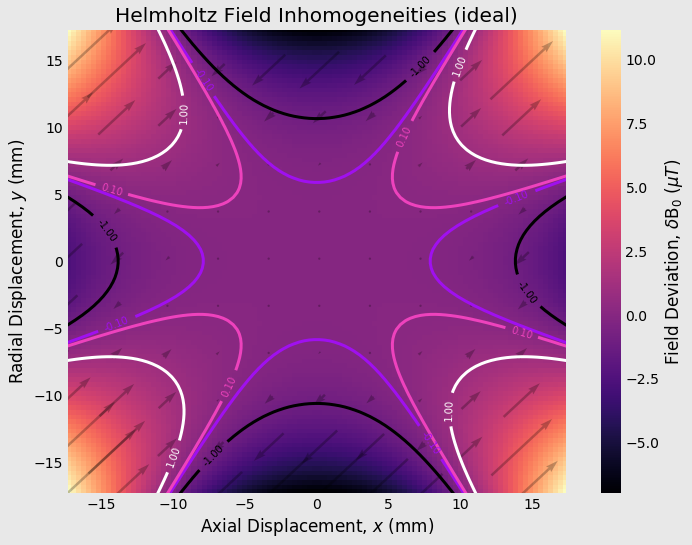

In [6]:
# define the resolution, area of interest, and axes
pts_per_axis = 100
img_span = R_avg/6 # (mm)

x = np.linspace(-img_span, img_span, pts_per_axis, 
                endpoint=True, dtype=np.float64)   # (mm)
y = np.linspace(-img_span, img_span, pts_per_axis, 
                 endpoint=True, dtype=np.float64)  # (mm)

# create empty arrays to store data in
Bx_map = np.empty(shape=[x.size, y.size], dtype=np.float64)
By_map = np.empty(shape=[x.size, y.size], dtype=np.float64)

# iterate over all (x,y) positions to calc. Bx and By using O(4) eqns.
for ix, xval in enumerate(x):
    for iy, yval in enumerate(y):
        Bx_map[ix,iy] = Bx(xval, yval, N, I, a, b, R_avg, tau, rho)
        By_map[ix,iy] = By(xval, yval, N, I, a, b, R_avg, tau, rho)

# make field vector and magnitude maps. calc B(0,0)
B_vector_map = np.arctan2(By_map, Bx_map)*180/np.pi
B_magnitude_map = np.sqrt(np.square(Bx_map) + np.square(By_map))
B_center = (np.sqrt(np.square(Bx(0, 0, N, I, a, b, R_avg, tau, rho)) + 
                    np.square(By(0, 0, N, I, a, b, R_avg, tau, rho))))

# calculate deviation from center field, B(0,0), in micro-Tesla
Z = (B_magnitude_map-B_center)*1E3

# plot central patch of Helmholtz field deviation
fig = plt.figure(figsize=(10,8))
plt.title('Helmholtz Field Inhomogeneities (ideal)')
plt.xlabel('Axial Displacement, $x$ (mm)')
plt.ylabel('Radial Displacement, $y$ (mm)')

axes_range = [x.min(), x.max(), y.min(), y.max()]
plt.imshow(Z, cmap='magma', vmin=Z.min(), vmax=Z.max(), interpolation='none',
           origin='lower', extent=axes_range, aspect='auto')

cbar = plt.colorbar()
cbar.set_label('Field Deviation, $\delta$B$_{0}$ ($\mu T$)')

# add quiver arrows for direction of field divergence
subsample_by = int(pts_per_axis/10)
plt.quiver(x[::subsample_by], y[::subsample_by], Z[::subsample_by, ::subsample_by], 
           Z[::subsample_by, ::subsample_by], angles='xy', units='width', 
           scale_units='xy', pivot='mid', alpha=0.25, width=0.005)

# add contour value overlay
contour_vals = [-1,-0.1,0.1,1]
CP = plt.contour(x, y, Z, contour_vals, linewidths=3, cmap='gnuplot2')
plt.clabel(CP, inline=1, fontsize=10, fmt='%1.2f')

plt.grid(False)
plt.show()

In [7]:
# check center and average field specs, along with deviation over total area
print('B(0,0) =', B_center, 'mT')
print('<Bx> =', np.average(Bx_map), u'\xb1', np.std(Bx_map), 'mT')
print('<By> =', np.average(By_map), u'\xb1', np.std(By_map), 'mT')
print('<B0> =', np.average(B_magnitude_map), u'\xb1', np.std(B_magnitude_map), 'mT')
print('<theta> =', np.average(B_vector_map), u'\xb1', np.std(B_vector_map), 'deg')

B(0,0) = 7.81339923637 mT
<Bx> = 7.81380575314 ± 0.00251386129665 mT
<By> = 3.81639164715e-21 ± 0.00174783405224 mT
<B0> = 7.8138059486 ± 0.00251391865568 mT
<theta> = -1.66533453694e-20 ± 0.0128150187309 deg


Okay, that looks fantastic! Within the contour lines showing a deviation of $\delta B_0=0.1 \mu T$, we have a field homogeneity of about 130 parts-per-billion (and 13 ppb within the $0.1 \mu T$ line). For this size electromagnet, this gives us an extremely clean field over a fairly large working volume, allowing for centimeter-scale objects or samples.  

## Non-Ideal Case
Now, the non-ideal case. What happens when we introduce even a minor imperfection? Let's see what the case with $\tau = 0.5$mm looks like. This is equivalent to a mismatch in coil radii by just half a milimeter. as you can see, the Helmholtz is fairly sensitive to changes in symmetry to the system. Now we'll probably need to make do with ppm deviations (still pretty good).  
![png](helmholtz_sim_imperfect.png)  

## Handling Imperfections  
Realistically, there will be a host of small imperfections. Here are a few of the most notorious:  

1. As the driving current heats up the coils, non-uniform thermal expansions of the magnet form material will take place, causing $\rho$ and $\tau$ to deviate from zero.  
2. While winding the magnet coils, as you reach the last turn of a horizontal layer, the wire has to suddenly "pop up" to the next vertical layer, leaving a small void and ruining the uniformity of current flowing through the coil.  
3. Real materials have a [magnetic susceptibility](https://en.wikipedia.org/wiki/Magnetic_susceptibility), $\chi_m$, causing them to become magnetized along with, or against, the electromagnet. Therefore, the materials of the magnet form, wires themselves, and any object placed in the magnet are going to affect the field distribution according to their intrinsic value of $\chi_m$.  
  
A few of these issues can be mitigated through a choice of materials - for instance, simply using aluminum for the magnet form solves most of the problems of points 1 and 3. The "pop up" effect is more difficult to deal with, though.  

For any real construction of a Helmholtz electromagnet, some number of non-ideal conditions are going to be unavoidable. Fortunately, there are few addon options available for these cases.  

1. A second set of smaller Helmholtz coils can be set within the center region of the first and act as correction coils (discussed in the [M.S. Crosser, et al. paper](https://aip.scitation.org/doi/abs/10.1063/1.3474227)).  
2. A third, central coil can be placed within the primary Helmholtz coil to act as a correction coil. This is called [a Maxwell coil](https://en.wikipedia.org/wiki/Maxwell_coil) and improves the Helmholtz field homogeneity out to $\mathcal{O}(6)$.  
3. A [magnetic core can be placed within the pole](https://en.wikipedia.org/wiki/Electromagnet#Magnetic_core) of each Helmholtz coil, acting as a field concentrator. Not only does this aid homogeneity, you get an added boost to magnetic field strength, as well. The drawback is that residual magnetization, or remanance, of the core will remain when the Helmholtz is driven to/around zero magnetic field.  

# References  
+ Simulations based on analytic solution of [M.S. Crosser, et al., "On the magnetic field near the center of Helmholtz coils" *Rev. Sci. Instrum.* **81**, 084701 (2010).](https://aip.scitation.org/doi/abs/10.1063/1.3474227) 

+ Alternative derivations for circular wire windings found in [R. Beiranvand, "Effects of the winding cross section shape on the magnetic field uniformity of the high field circular Helmholtz coil systems", *IEEE Trans. Ind. Electron.* **64**, 9, 7120-7131 (2017).](https://ieeexplore.ieee.org/abstract/document/7885034/)

+ A pretty slick DIY coil-winding robot: [Hackaday.com | Delta Printer Morphs into CNC Flat Coil Winder](https://hackaday.com/2018/06/16/delta-printer-morphs-into-cnc-flat-coil-winder/)

+ Excellent source within the US for square magnet wire : [MWS Wire Industries](http://mwswire.com/magnet-wire/)

+ Square magnet wire without many options available worldwide: [Tongling Jinglong Electric Material Co.](https://www.ecvv.com/product/2165972.html)